# Coding Assignment 1 - STAT 542

**Contributors:**



Mingchen Du - mdu10

Amarthya Kuchana - kuchana2

**Program**: MS in Statistics

The contribution is equal from both the team members. To be specific, Amarthya Kuchana worked on the code drafts where as Mingchen Du reviewed the content and has drawn insights from the code.

In [106]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import math


### **Part 1: Generate Data**

1. Generate 20 centers

Mean Structure:

\begin{pmatrix}
0 & 2 \\
2 & 0
\end{pmatrix}

Covariance Structure:

\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}



In [107]:
np.random.seed(669420675)

mean_0 = [0, 2]
mean_1 = [2,0]

# Covariance matrix
cov = [[1, 0],
       [0, 1]]

# Number of samples
n_samples = 10

# Generating centers for each class
class_0 = np.random.multivariate_normal(mean_0, cov, n_samples)
class_1 = np.random.multivariate_normal(mean_1, cov, n_samples)

2. Given the 20 centers, generate the training samples and test samples


In [108]:
#Function to generate training and testing sample
def generate_class_samples(mean_array,size,label):

  label_column = label*np.ones((size*10,1),dtype = np.int8)

  s_square = 1/5
  cov_matrix = [[s_square, 0],[0, s_square]]
  samples_array = []

  for k in range(10):
    samples_array.append(np.random.multivariate_normal(mean_array[k],cov = cov_matrix, size = size))
  result = np.vstack(samples_array)
  return np.hstack((result,label_column))

In [109]:
#Train and Test Samples
class1_train_samples = generate_class_samples(class_1,10,1)
class0_train_samples = generate_class_samples(class_0,10,0)

class1_test_samples = generate_class_samples(class_1,500,1)
class0_test_samples = generate_class_samples(class_0,500,0)

3. Produce a scatter plot of the training data

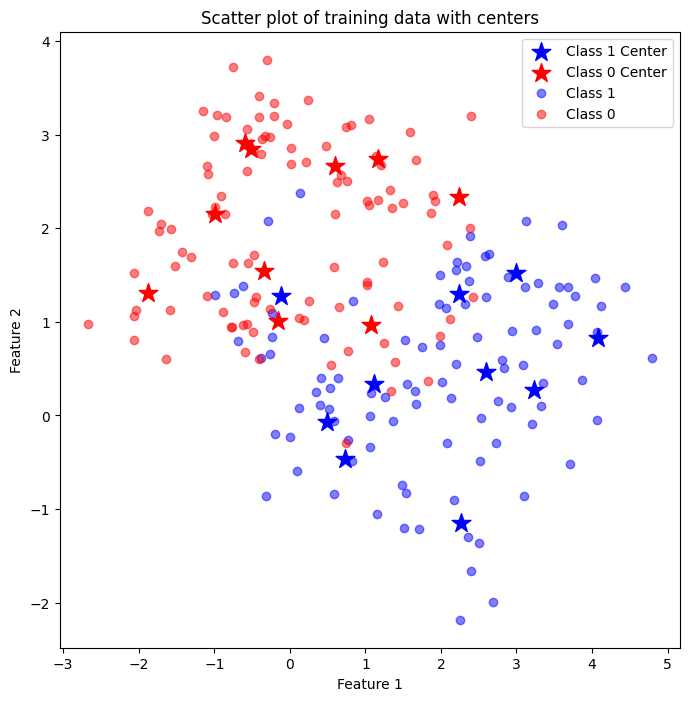

In [110]:
#Scatter plot

class1X = class_1[:,0]
class1Y = class_1[:,1]

class0X = class_0[:,0]
class0Y = class_0[:,1]

class1_trainX = class1_train_samples[:,0]
class1_trainY = class1_train_samples[:,1]

class0_trainX = class0_train_samples[:,0]
class0_trainY = class0_train_samples[:,1]


plt.figure(figsize=(8, 8))
plt.scatter(class1X,class1Y, color = "blue",marker='*', s=200, label='Class 1 Center')
plt.scatter(class0X,class0Y, color = "red",marker='*', s=200, label='Class 0 Center')

plt.scatter(class1_trainX,class1_trainY, color = "blue", alpha=0.5, label='Class 1')
plt.scatter(class0_trainX,class0_trainY, color = "red", alpha=0.5, label='Class 0')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of training data with centers')
plt.show()


**Part2: KNN**

1. Build KNN from Scratch



In [111]:
training_data = np.vstack((class0_train_samples,class1_train_samples))
test_data = np.vstack((class0_test_samples,class1_test_samples))

In [112]:
#KNN from scratch function
def knn_scratch(training_data, testing_data, k):
    # Extract feature vectors and labels from the training data
    X_train = training_data[:, :-1]
    y_train = training_data[:, -1]

    # Extract feature vectors from the testing data
    X_test = testing_data[:, :-1]

    # Calculate the squared differences
    # Adding an extra dimension to X_train and X_test for broadcasting
    # Calculating the Euclidean distance but without taking the square root to make it faster
    # We only need it for ranking purposes

    squared_diffs = np.sum((X_train[:, np.newaxis, :] - X_test[np.newaxis, :, :]) ** 2, axis=-1)

    #print(squared_diffs)

    # Get the indices of k smallest distances for each test point
    k_nearest_indices = np.argpartition(squared_diffs, k, axis=0)[:k, :]

    #print(k_nearest_indices)

    # Get the k smallest distance labels for each test point
    k_nearest_labels = y_train[k_nearest_indices]

    # Calculate the predicted labels for the test set by taking the majority vote
    predicted_labels = np.mean(k_nearest_labels, axis=0)

    # Convert probabilities to binary labels 0 or 1
    predicted_labels = (predicted_labels >= 0.5).astype(int)

    # Find the indices where predicted_labels is exactly 0.5
    indices = np.where(predicted_labels == 0.5)[0]

    # Assign a random value of 0 or 1 to these indices to tackle the voting tie
    random_class = np.random.randint(0, 2, size=len(indices))
    predicted_labels[indices] = random_class

    return predicted_labels

2. In case of a voting tie, the algorithm randomly predicts one of the two classes.
In the case of distance tie, since we are using 'np.argpartition' where the sorting is not guaranteed after k values, we can take the calculation as a random selection.

3. Test our KNN function with the training/test data you just generated when K = 1, 3, 5; and compare your results with sklearn.neighbors in Python.

In [113]:
# Testing for k = 1, 3, 5
k_values = [1, 3, 5]
labels = [0,1]
for k in k_values:
    # Predictions from sklearn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data[:,0:2], training_data[:,2])
    predictions_sklearn = knn.predict(test_data[:,0:2])
    print(f"Confusion matrix for k={k} (sklearn):\n", confusion_matrix(test_data[:,2], predictions_sklearn,labels = labels))

    # Prediction from KNN Scratch
    predictions_knn_scratch = knn_scratch(training_data,test_data,k)
    print(f"Confusion matrix for k={k} (knn scratch):\n", confusion_matrix(test_data[:,2], predictions_knn_scratch,labels = labels))

Confusion matrix for k=1 (sklearn):
 [[4188  812]
 [ 802 4198]]
Confusion matrix for k=1 (knn scratch):
 [[4188  812]
 [ 802 4198]]
Confusion matrix for k=3 (sklearn):
 [[4343  657]
 [ 711 4289]]
Confusion matrix for k=3 (knn scratch):
 [[4343  657]
 [ 711 4289]]
Confusion matrix for k=5 (sklearn):
 [[4440  560]
 [ 648 4352]]
Confusion matrix for k=5 (knn scratch):
 [[4440  560]
 [ 648 4352]]


Our implementation of KNN match precisely with the Python in-built sklearn library from the above confusion matrices.

**Part3: cvKNN**

1. Implement KNN classification with K chosen by 10-fold cross-validation from scratch

In [114]:
np.random.seed(673)
shuffled_training_data = np.random.permutation(training_data)

Set the candidates K value from 1 to 180. Because the sample size is 200, in 10-fold cross validation, the original data will be partitioned into 10 subsets with size of 20. Then, the new training data is created by subtracting the subset from the original data. Therefore, the size of the new training data will be 180, so it does not make sense if K exceed 180.

In [115]:
#Function to implement 10-fold cross validation
def cvKNN(shuffled_training_data):

  K_arr = list(range(1,181))

  CV_error_across_Ks = []

  for K in K_arr:

    CV_error_for_each_K = 0

    for i in range(10):
      fold_starting_index = 20*i

      fold_ending_index = fold_starting_index + 20

      test_data_fold = shuffled_training_data[fold_starting_index:fold_ending_index,:]

      training_index_part1 = shuffled_training_data[0:fold_starting_index,:]
      training_index_part2 = shuffled_training_data[fold_ending_index:,:]

      training_data_fold = np.vstack((training_index_part1,training_index_part2))

      knn = KNeighborsClassifier(n_neighbors=K)

      X_train = training_data_fold[:,0:2]
      y_train = training_data_fold[:,2]

      X_test = test_data_fold[:,0:2]
      y_test = test_data_fold[:,2]

      knn.fit(X_train, y_train)

      y_pred = knn.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)

      CV_error_for_each_K += (1-accuracy)*100

    CV_error = CV_error_for_each_K/10

    CV_error_across_Ks.append(CV_error)

  min_error = 10000
  for i in range(len(CV_error_across_Ks)):
    if CV_error_across_Ks[i] <= min_error:
      #We have put <= instead of < because we want to go for a simpler model (higher K) when the errors are matching
      min_error = CV_error_across_Ks[i]
      min_index = i
  return min_error,min_index


In the for loop in the end of the function, in the condition of choosing the minimum error, We put <= instead of < because we want to go for a simpler model (higher K) when the errors are matching.

In [116]:
min_error_opt_K,opt_K = cvKNN(shuffled_training_data)
print(f"Optimum K is {opt_K}")

Optimum K is 65


2. Test the function with our training data and Generating confusion matrix when the optimum K is used for test dataset.



In [117]:
knn = KNeighborsClassifier(n_neighbors=opt_K)

knn.fit(training_data[:,0:2], training_data[:,2])
y_pred = knn.predict(test_data[:,0:2])

cm = confusion_matrix(test_data[:,2], y_pred, labels = labels)
print(f"Confusion matrix for Optimum K={opt_K} (KNN with 10-fold Cross validation):\n", cm)

Confusion matrix for Optimum K=65 (KNN with 10-fold Cross validation):
 [[4313  687]
 [ 557 4443]]


**PART 4: Bayes Rule**

1. Implement Bayes Rule, and then generate the confusion matrix

In [118]:
#Function to implement Bayes Rule; calculating the ratio of probabilities
def bayes_rule(test_data):

  labels = [0,1]

  test_X = test_data[:,0:2]
  test_Y = test_data[:,2]

  num_stack = np.empty((test_X.shape[0],0))
  den_stack = np.empty((test_X.shape[0],0))

  for i in range(10):
    s_square = 1/5
    distance_square_num = np.sum((test_X - class_1[i,:])**2,axis = 1)
    numerator = pow(math.exp(1),-distance_square_num/(2*s_square))

    distance_square_den = np.sum((test_X - class_0[i,:])**2,axis = 1)
    denominator = pow(math.exp(1),-distance_square_den/(2*s_square))

    numerator = numerator.reshape(-1,1)
    denominator = denominator.reshape(-1,1)

    num_stack = np.hstack((num_stack,numerator))
    den_stack = np.hstack((den_stack,denominator))

  class1_probability = np.sum(num_stack,axis = 1)
  class0_probability = np.sum(den_stack,axis = 1)

  probability_ratio = class1_probability/class0_probability

  y_pred_bayes = (probability_ratio > 1).astype(int)
  cm = confusion_matrix(test_Y, y_pred_bayes,labels = labels)

  test_error = 1 - np.trace(cm) / np.sum(cm)

  return cm,test_error

2. Testing the above implementation on the Test Data

In [119]:
Confusion_matrix_Bayes,_ = bayes_rule(test_data)
print(f"Confusion matrix using Bayes Rule :\n", Confusion_matrix_Bayes)

Confusion matrix using Bayes Rule :
 [[4655  345]
 [ 711 4289]]


**PART 5: Simulation Study**

Simulation : 0
Simulation : 1
Simulation : 2
Simulation : 3
Simulation : 4
Simulation : 5
Simulation : 6
Simulation : 7
Simulation : 8
Simulation : 9
Simulation : 10
Simulation : 11
Simulation : 12
Simulation : 13
Simulation : 14
Simulation : 15
Simulation : 16
Simulation : 17
Simulation : 18
Simulation : 19
Simulation : 20
Simulation : 21
Simulation : 22
Simulation : 23
Simulation : 24
Simulation : 25
Simulation : 26
Simulation : 27
Simulation : 28
Simulation : 29
Simulation : 30
Simulation : 31
Simulation : 32
Simulation : 33
Simulation : 34
Simulation : 35
Simulation : 36
Simulation : 37
Simulation : 38
Simulation : 39
Simulation : 40
Simulation : 41
Simulation : 42
Simulation : 43
Simulation : 44
Simulation : 45
Simulation : 46
Simulation : 47
Simulation : 48
Simulation : 49


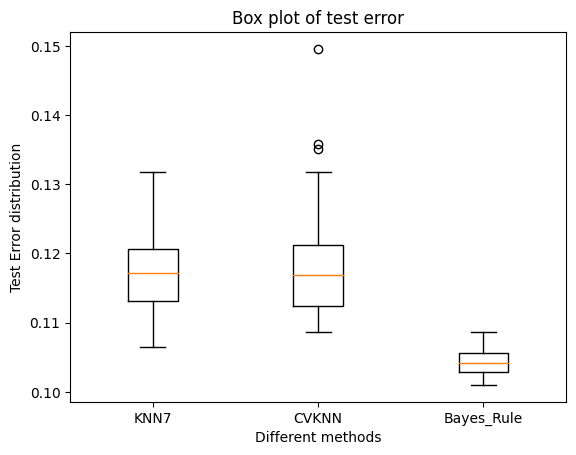

In [120]:
KNN7_test_error = []
CVKNN_test_error = []
Bayes_rule_test_error = []

for i in range(50):
  labels = [0,1]
  class1_train_samples = generate_class_samples(class_1,10,1)
  class0_train_samples = generate_class_samples(class_0,10,0)

  class1_test_samples = generate_class_samples(class_1,500,1)
  class0_test_samples = generate_class_samples(class_0,500,0)

  training_data_simulation_study = np.vstack((class0_train_samples,class1_train_samples))
  test_data_simulation_study = np.vstack((class0_test_samples,class1_test_samples))

  #Part 5.1 - KNN where k is 7
  knn = KNeighborsClassifier(n_neighbors=7)

  knn.fit(training_data_simulation_study[:,0:2], training_data_simulation_study[:,2])
  y_pred = knn.predict(test_data_simulation_study[:,0:2])

  cm = confusion_matrix(test_data_simulation_study[:,2], y_pred,labels = labels)
  test_error_KNN7 = 1 - np.trace(cm) / np.sum(cm)
  KNN7_test_error.append(test_error_KNN7)

  #Part 5.2 - KNN where K chosen by 10-fold Cross Validation

  shuffled_training_data_simulation_study = np.random.permutation(training_data_simulation_study)
  min_error_opt_K,opt_K = cvKNN(shuffled_training_data_simulation_study)

  knn = KNeighborsClassifier(n_neighbors=opt_K)

  knn.fit(training_data_simulation_study[:,0:2], training_data_simulation_study[:,2])
  y_pred = knn.predict(test_data_simulation_study[:,0:2])

  cm = confusion_matrix(test_data_simulation_study[:,2], y_pred,labels = labels)
  test_error_CVKNN = 1 - np.trace(cm) / np.sum(cm)
  CVKNN_test_error.append(test_error_CVKNN)

  #Part 5.3 - Bayes rule

  _,test_error_bayes = bayes_rule(test_data_simulation_study)
  Bayes_rule_test_error.append(test_error_bayes)

  print(f"Simulation : {i}")

#BOX PLOT

box_plot = [KNN7_test_error,CVKNN_test_error,Bayes_rule_test_error]

# Create the boxplot
plt.boxplot(box_plot)

# Add labels and title
plt.xticks([1, 2, 3], ['KNN7','CVKNN','Bayes_Rule'])
plt.title('Box plot of test error')
plt.ylabel('Test Error distribution')
plt.xlabel('Different methods')

# Show the plot
plt.show()

In [121]:
#Reporting median, min, max, 25% quantile, 75% quantile

#KNN7
print("For KNN7: \n")
print(f"Minimum of the test errors is {round(min(KNN7_test_error),4)}\n")
print(f"Maximum of the test errors is {round(max(KNN7_test_error),4)}\n")
print(f"Median of the test errors is {round(np.median(KNN7_test_error),4)}\n")
print(f"25% quantile of the test errors is {round(np.percentile(KNN7_test_error, 25),4)}\n")
print(f"75% quantile of the test errors is {round(np.percentile(KNN7_test_error, 75),4)}\n")

#CVKNN
print("For CVKNN: \n")
print(f"Minimum of the test errors is {round(min(CVKNN_test_error),4)}\n")
print(f"Maximum of the test errors is {round(max(CVKNN_test_error),4)}\n")
print(f"Median of the test errors is {round(np.median(CVKNN_test_error),4)}\n")
print(f"25% quantile of the test errors is {round(np.percentile(CVKNN_test_error, 25),4)}\n")
print(f"75% quantile of the test errors is {round(np.percentile(CVKNN_test_error, 75),4)}\n")

#Bayes_Rule
print("For Bayes Rule: \n")
print(f"Minimum of the test errors is {round(min(Bayes_rule_test_error),4)}\n")
print(f"Maximum of the test errors is {round(max(Bayes_rule_test_error),4)}\n")
print(f"Median of the test errors is {round(np.median(Bayes_rule_test_error),4)}\n")
print(f"25% quantile of the test errors is {round(np.percentile(Bayes_rule_test_error, 25),4)}\n")
print(f"75% quantile of the test errors is {round(np.percentile(Bayes_rule_test_error, 75),4)}\n")


For KNN7: 

Minimum of the test errors is 0.1065

Maximum of the test errors is 0.1318

Median of the test errors is 0.1172

25% quantile of the test errors is 0.1131

75% quantile of the test errors is 0.1207

For CVKNN: 

Minimum of the test errors is 0.1086

Maximum of the test errors is 0.1496

Median of the test errors is 0.117

25% quantile of the test errors is 0.1124

75% quantile of the test errors is 0.1211

For Bayes Rule: 

Minimum of the test errors is 0.101

Maximum of the test errors is 0.1086

Median of the test errors is 0.1042

25% quantile of the test errors is 0.1028

75% quantile of the test errors is 0.1057

